### Implementation in Python:

####  Import Data
Let us use Pandas to examine a useful, albiet trivial, data set.

In [1]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
df.tail()


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


This data set contains the measurements of 150 Iris flowers belonging to three species. It is a <b> labeled </b> data set which means that in addition to the measurements, each sample is labeled with the actual the species name as well.  Such labeled datasets are essential for supervised machine learning tasks.  Each measurement (column) is called a <b> feature </b>.  The dataset then has the following features  [Sepal length, Sepal width, Petal length, Petal width, and class label] According to our prior vector notation an individual flower would be a 5 dimensional vector $x^{(j)}$, where the "3rd" feature (labeled 2 above due to Pythons 'lovely' zero indexing!) would be $x_3$

For actual implementation we will import the data set using NumPy, and we will only use Pedal Length and Pedal Width (columns 2 and 3) to enable easy visualization (IRL classification can be done on many features simulatanously, but obviously cannot be graphed in 2D)  

In [2]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


#### Split Data
Let us split the data into a training set and a test set.<br>
Notes: <br>
1) 'test_size =.2'-- We can choose the size of the test set via this user defined parameter, we choose 20% <br>
2) 'random_state=1' -- The training data set is shuffled prior to be used, else we would bias our training against class 2  samples since they are bottom of the list.  This fixed random seed allows us to reproduce results.<br>
3) 'stratify=y' -- This splits both the training and test data sets such that they proportionally mirror the class labels percentages from original data set. 

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

####  Feature Scaling 
We saw in class that Gradient Descent algorithms (https://en.wikipedia.org/wiki/Gradient_descent) behave very badly when the sublevel sets for the convex function are highly elliptical (equivilently data is poorly conditioned).  For some datasets it is easy to scale the features to precondition the data and enable faster gradient descent.  This is typically done by standardizing the data using the estimators $\hat{\mu_i}$ and $\hat{\sigma_i}$ for each feature $i$. 

In [4]:
from sklearn.preprocessing import StandardScaler 

sc = StandardScaler() #assign the standardscaler class to the variable sc for ease of use
sc.fit(X_train) # The StandardScaler fit function finds the mean and standard deviation for us to allow fitting

# here we transform the data and rename transformed data
X_train_std = sc.transform(X_train) 
X_test_std = sc.transform(X_test)

#### Training our Perceptron
We are now going to leverage the built in tools in the SciKit-Learn API to train, test and display the behavior of our Adaline perceptron.  For extensive details on all options for this class see: <br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html
<br>
<br>
<b>First </b> we train (i.e fit our perceptron) on the standardized training data

In [5]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, max_iter=40, random_state=1)

#### Evaluating our Percepton

Now that we have trained our percepton we want to test how it is performing.  There are multiple ways of doing this.  We will show a few different. <br>
<b> First: </b> We will look at the number of misclassified samples.  This is perhaps not the most informative however as 3 misslcassified  out of 5 test samples is quite different meaning then 3 missclaissfied out of 5,000 test samples.  So, <br>
<b> Second: </b> We will use a generic Sci-Kit Learn built in tool to output the accuracy percentage. <br>
<b> Third: </b> We will use the perceptron classifier built in tool to outout accuracy percentage <br>
<b> Fourth: </b> We will look at the resulting scatter plot map of points and the linear seperator to see why we are not getting good classification.

In [6]:
# First Look at the number of misclassified samples

y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 1


In [7]:
#Second: Sklearn has a built in metrics module we could use for any classifier which compares test output vs predicted output 
from sklearn.metrics import accuracy_score
print('Generic Accuracy: %.2f' % accuracy_score(y_test, y_pred))

#Third:  Every sklearn classifier also has a built in score method for outputing accuracy
print('Perceptron Accuracy: %.2f' % ppn.score(X_test_std, y_test))

Generic Accuracy: 0.98
Perceptron Accuracy: 0.98


<b> Visualize output </b>

In [10]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', '^', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')
        

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        for idx, cl in enumerate(np.unique(y_test)):
            plt.scatter(X_test[y_test == cl, 0],
                        X_test[y_test == cl, 1],
                        c=colors[idx],
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')

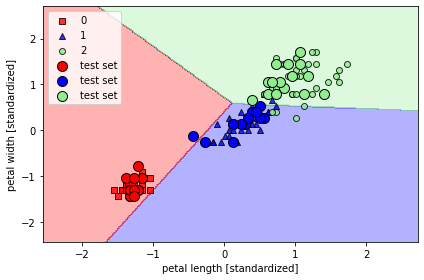

In [11]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()

plt.show()

So we can see that <b> NO </b> linear seperator exists that will perfectly seperate these classes because flower class 1 and flower class 2 overlap.  Applying kernal tricks or non-linear seperators may work, however Perceptrons are for our purposed just stepping stones to full up Neural Networks.